# End-to-End Camera Calibration

see https://docs.google.com/document/d/1-ikSOxtrC4HLzd8xBdokjfMbbz0616eOBsco-bDk3os/edit

In [28]:
print("hello")

# this is from https://stackoverflow.com/questions/37872171/how-can-i-perform-two-dimensional-interpolation-using-scipy

import numpy as np
import scipy.interpolate as interp

# auxiliary function for mesh generation
def gimme_mesh(n):
    minval = -1
    maxval =  1
    # produce an asymmetric shape in order to catch issues with transpositions
    return np.meshgrid(np.linspace(minval, maxval, n),
                       np.linspace(minval, maxval, n + 1))

# set up underlying test functions, vectorized
def fun_smooth(x, y):
    return np.cos(np.pi*x) * np.sin(np.pi*y)

def fun_evil(x, y):
    # watch out for singular origin; function has no unique limit there
    return np.where(x**2 + y**2 > 1e-10, x*y/(x**2+y**2), 0.5)

# sparse input mesh, 6x7 in shape
N_sparse = 6
x_sparse, y_sparse = gimme_mesh(N_sparse)
print(x_sparse)
z_sparse_smooth = fun_smooth(x_sparse, y_sparse)
z_sparse_evil = fun_evil(x_sparse, y_sparse)

# scattered input points, 10^2 altogether (shape (100,))
N_scattered = 10
rng = np.random.default_rng()
x_scattered, y_scattered = rng.random((2, N_scattered**2))*2 - 1
z_scattered_smooth = fun_smooth(x_scattered, y_scattered)
z_scattered_evil = fun_evil(x_scattered, y_scattered)

# dense output mesh, 20x21 in shape
N_dense = 20
x_dense, y_dense = gimme_mesh(N_dense)

hello
[[-1.  -0.6 -0.2  0.2  0.6  1. ]
 [-1.  -0.6 -0.2  0.2  0.6  1. ]
 [-1.  -0.6 -0.2  0.2  0.6  1. ]
 [-1.  -0.6 -0.2  0.2  0.6  1. ]
 [-1.  -0.6 -0.2  0.2  0.6  1. ]
 [-1.  -0.6 -0.2  0.2  0.6  1. ]
 [-1.  -0.6 -0.2  0.2  0.6  1. ]]


In [29]:
import scipy.interpolate as interp

sparse_points = np.stack([x_sparse.ravel(), y_sparse.ravel()], -1)  # shape (N, 2) in 2d
print(sparse_points)
dense_points = np.stack([x_dense.ravel(), y_dense.ravel()], -1)  # shape (N, 2) in 2d

# this wants an an array of pairs, and then an array of scalars.
zfun_smooth_rbf = interp.RBFInterpolator(sparse_points, z_sparse_smooth.ravel(),
                                         smoothing=0, kernel='cubic')  # explicit default smoothing=0 for interpolation
z_dense_smooth_rbf = zfun_smooth_rbf(dense_points).reshape(x_dense.shape)  # not really a function, but a callable class instance

zfun_evil_rbf = interp.RBFInterpolator(sparse_points, z_sparse_evil.ravel(),
                                       smoothing=0, kernel='cubic')  # explicit default smoothing=0 for interpolation
z_dense_evil_rbf = zfun_evil_rbf(dense_points).reshape(x_dense.shape)  # not really a function, but a callable class instance


[[-1.         -1.        ]
 [-0.6        -1.        ]
 [-0.2        -1.        ]
 [ 0.2        -1.        ]
 [ 0.6        -1.        ]
 [ 1.         -1.        ]
 [-1.         -0.66666667]
 [-0.6        -0.66666667]
 [-0.2        -0.66666667]
 [ 0.2        -0.66666667]
 [ 0.6        -0.66666667]
 [ 1.         -0.66666667]
 [-1.         -0.33333333]
 [-0.6        -0.33333333]
 [-0.2        -0.33333333]
 [ 0.2        -0.33333333]
 [ 0.6        -0.33333333]
 [ 1.         -0.33333333]
 [-1.          0.        ]
 [-0.6         0.        ]
 [-0.2         0.        ]
 [ 0.2         0.        ]
 [ 0.6         0.        ]
 [ 1.          0.        ]
 [-1.          0.33333333]
 [-0.6         0.33333333]
 [-0.2         0.33333333]
 [ 0.2         0.33333333]
 [ 0.6         0.33333333]
 [ 1.          0.33333333]
 [-1.          0.66666667]
 [-0.6         0.66666667]
 [-0.2         0.66666667]
 [ 0.2         0.66666667]
 [ 0.6         0.66666667]
 [ 1.          0.66666667]
 [-1.          1.        ]
 

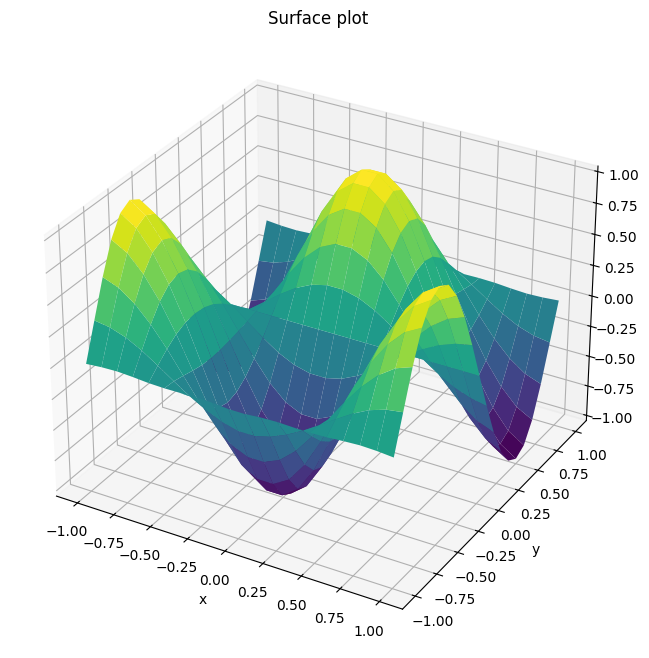

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8),dpi=100)
ax = plt.axes(projection='3d')

ax.plot_surface(x_dense, y_dense, z_dense_smooth_rbf ,cmap='viridis', edgecolor='none')
# ax.invert_xaxis()
ax.set_title('Surface plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [8]:


# this takes an array of vedtors (pairs), and then an array of scalars (but could be array of vectors)
zfun_smooth_rbf = interp.LinearNDInterpolator(sparse_points, z_sparse_smooth.ravel())
z_dense_smooth_rbf = zfun_smooth_rbf(dense_points).reshape(x_dense.shape)  # not really a function, but a callable class instance

zfun_evil_rbf = interp.LinearNDInterpolator(sparse_points, z_sparse_evil.ravel()) 
z_dense_evil_rbf = zfun_evil_rbf(dense_points).reshape(x_dense.shape)  # not really a function, but a callable class instance

In [63]:
print(dense_points)

[[-1.         -1.        ]
 [-0.89473684 -1.        ]
 [-0.78947368 -1.        ]
 [-0.68421053 -1.        ]
 [-0.57894737 -1.        ]
 [-0.47368421 -1.        ]
 [-0.36842105 -1.        ]
 [-0.26315789 -1.        ]
 [-0.15789474 -1.        ]
 [-0.05263158 -1.        ]
 [ 0.05263158 -1.        ]
 [ 0.15789474 -1.        ]
 [ 0.26315789 -1.        ]
 [ 0.36842105 -1.        ]
 [ 0.47368421 -1.        ]
 [ 0.57894737 -1.        ]
 [ 0.68421053 -1.        ]
 [ 0.78947368 -1.        ]
 [ 0.89473684 -1.        ]
 [ 1.         -1.        ]
 [-1.         -0.9       ]
 [-0.89473684 -0.9       ]
 [-0.78947368 -0.9       ]
 [-0.68421053 -0.9       ]
 [-0.57894737 -0.9       ]
 [-0.47368421 -0.9       ]
 [-0.36842105 -0.9       ]
 [-0.26315789 -0.9       ]
 [-0.15789474 -0.9       ]
 [-0.05263158 -0.9       ]
 [ 0.05263158 -0.9       ]
 [ 0.15789474 -0.9       ]
 [ 0.26315789 -0.9       ]
 [ 0.36842105 -0.9       ]
 [ 0.47368421 -0.9       ]
 [ 0.57894737 -0.9       ]
 [ 0.68421053 -0.9       ]
 

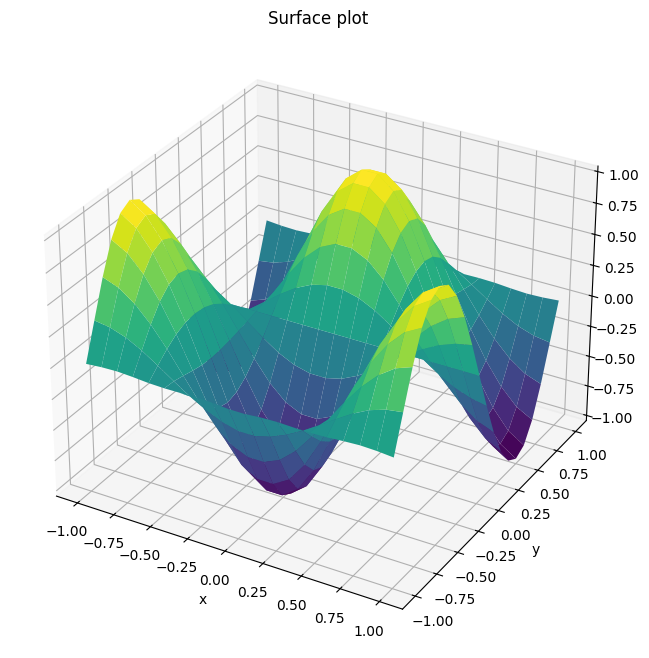

In [34]:
fig = plt.figure(figsize=(10,8),dpi=100)
ax = plt.axes(projection='3d')

ax.plot_surface(x_dense, y_dense, z_dense_smooth_rbf ,cmap='viridis')
# ax.invert_xaxis()
ax.set_title('Surface plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

[[-1.  -0.5  0.   0.5  1.  -1.  -0.5  0.   0.5  1.  -1.  -0.5  0.   0.5
   1.  -1.  -0.5  0.   0.5  1.  -1.  -0.5  0.   0.5  1. ]
 [ 1.   1.   1.   1.   1.   1.5  1.5  1.5  1.5  1.5  2.   2.   2.   2.
   2.   2.5  2.5  2.5  2.5  2.5  3.   3.   3.   3.   3. ]
 [ 3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.
   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3. ]]
[[ 89.34056238 169.67028119 250.         330.32971881 410.65943762
  100.83024871 175.41512436 250.         324.58487564 399.16975129
  110.78623114 180.39311557 250.         319.60688443 389.21376886
  119.49638634 184.74819317 250.         315.25180683 380.50361366
  127.1807872  188.5903936  250.         311.4096064  372.8192128 ]
 [159.91920862 159.91920862 159.91920862 159.91920862 159.91920862
  231.81579367 231.81579367 231.81579367 231.81579367 231.81579367
  294.1152435  294.1152435  294.1152435  294.1152435  294.1152435
  348.61894322 348.61894322 348.61894322 348.61894322 348.61894322
  396.70

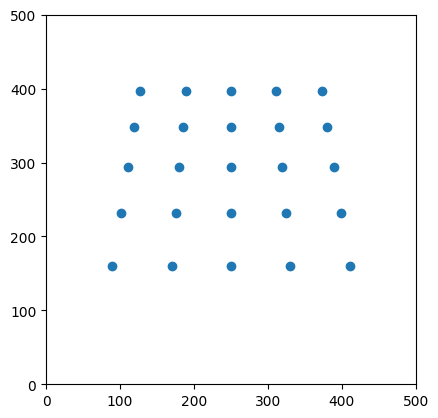

In [94]:
# this is from https://forum.opencv.org/t/understanding-the-functions-projectpoints-and-undistortpoints/10847

import cv2

# calibration matrix
K = np.array([[500.0, 0.0, 250.0], [0.0, 500.0, 250.0], [0.0, 0.0, 1.0]])

# distortion coefficients (k1, k2, p1, p2, k3)
# A LOT of distortion, in order to see it work.
# distCoeffs = np.array([10.5, -0.95, -0.005, 0.0025, 1.16])
distCoeffs = np.array([0.0, 0.0, 0.0, 0.0, 0.0])

# Real world points
# +/- 1 meter side to side, 1-3 meters up
X, Y = np.meshgrid(np.linspace(-1, 1, 5), np.linspace(1, 3, 5))
# print(X)
X, Y = X.reshape(1, -1), Y.reshape(1, -1)
# print(X)
# three meters away
Z = 3
Z_vec = Z * np.ones_like(X)
P_c = np.concatenate((X, Y, Z_vec), axis=0)
print(P_c)

# in camera coords, pitch up is along x; 0.5 rad is a reasonable pitch
rvec = np.array([0.5, 0.0, 0.0])
tvec = np.array([0.0, 0.0, 0.0])

# project points, including with lens distortion
U_dist, _ = cv2.projectPoints(P_c, rvec, tvec, K, distCoeffs)
# projections as (2, n) array.
pts = U_dist[:, 0].T

print(pts)
plt.scatter(pts[0], pts[1])
# plt.gca().invert_yaxis()
plt.gca().set_aspect('equal')
plt.xlim(0,500)
plt.ylim(0,500)
plt.show()

In [95]:
XY = np.stack([X.ravel(), Y.ravel()], -1)
print(XY)
print(Z_vec)


[[-1.   1. ]
 [-0.5  1. ]
 [ 0.   1. ]
 [ 0.5  1. ]
 [ 1.   1. ]
 [-1.   1.5]
 [-0.5  1.5]
 [ 0.   1.5]
 [ 0.5  1.5]
 [ 1.   1.5]
 [-1.   2. ]
 [-0.5  2. ]
 [ 0.   2. ]
 [ 0.5  2. ]
 [ 1.   2. ]
 [-1.   2.5]
 [-0.5  2.5]
 [ 0.   2.5]
 [ 0.5  2.5]
 [ 1.   2.5]
 [-1.   3. ]
 [-0.5  3. ]
 [ 0.   3. ]
 [ 0.5  3. ]
 [ 1.   3. ]]
[[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
  3.]]


In [96]:
uv = U_dist[:, 0]
print(uv)
# TODO: X and Y together
X_vec = X.ravel()
print(X_vec)

[[ 89.34056238 159.91920862]
 [169.67028119 159.91920862]
 [250.         159.91920862]
 [330.32971881 159.91920862]
 [410.65943762 159.91920862]
 [100.83024871 231.81579367]
 [175.41512436 231.81579367]
 [250.         231.81579367]
 [324.58487564 231.81579367]
 [399.16975129 231.81579367]
 [110.78623114 294.1152435 ]
 [180.39311557 294.1152435 ]
 [250.         294.1152435 ]
 [319.60688443 294.1152435 ]
 [389.21376886 294.1152435 ]
 [119.49638634 348.61894322]
 [184.74819317 348.61894322]
 [250.         348.61894322]
 [315.25180683 348.61894322]
 [380.50361366 348.61894322]
 [127.1807872  396.70399651]
 [188.5903936  396.70399651]
 [250.         396.70399651]
 [311.4096064  396.70399651]
 [372.8192128  396.70399651]]
[-1.  -0.5  0.   0.5  1.  -1.  -0.5  0.   0.5  1.  -1.  -0.5  0.   0.5
  1.  -1.  -0.5  0.   0.5  1.  -1.  -0.5  0.   0.5  1. ]


In [97]:
XY = np.stack([X.ravel(), Y.ravel()], -1)
print(XY)

[[-1.   1. ]
 [-0.5  1. ]
 [ 0.   1. ]
 [ 0.5  1. ]
 [ 1.   1. ]
 [-1.   1.5]
 [-0.5  1.5]
 [ 0.   1.5]
 [ 0.5  1.5]
 [ 1.   1.5]
 [-1.   2. ]
 [-0.5  2. ]
 [ 0.   2. ]
 [ 0.5  2. ]
 [ 1.   2. ]
 [-1.   2.5]
 [-0.5  2.5]
 [ 0.   2.5]
 [ 0.5  2.5]
 [ 1.   2.5]
 [-1.   3. ]
 [-0.5  3. ]
 [ 0.   3. ]
 [ 0.5  3. ]
 [ 1.   3. ]]


In [98]:
u_interp = interp.LinearNDInterpolator(uv, XY)
print(u_interp(uv))

[[-1.00000000e+00  1.00000000e+00]
 [-5.00000000e-01  1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00]
 [ 5.00000000e-01  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00]
 [-1.00000000e+00  1.50000000e+00]
 [-5.00000000e-01  1.50000000e+00]
 [ 0.00000000e+00  1.50000000e+00]
 [ 5.00000000e-01  1.50000000e+00]
 [ 1.00000000e+00  1.50000000e+00]
 [-1.00000000e+00  2.00000000e+00]
 [-5.00000000e-01  2.00000000e+00]
 [ 1.66533454e-16  2.00000000e+00]
 [ 5.00000000e-01  2.00000000e+00]
 [ 1.00000000e+00  2.00000000e+00]
 [-1.00000000e+00  2.50000000e+00]
 [-5.00000000e-01  2.50000000e+00]
 [ 0.00000000e+00  2.50000000e+00]
 [ 5.00000000e-01  2.50000000e+00]
 [ 1.00000000e+00  2.50000000e+00]
 [-1.00000000e+00  3.00000000e+00]
 [-5.00000000e-01  3.00000000e+00]
 [ 0.00000000e+00  3.00000000e+00]
 [ 5.00000000e-01  3.00000000e+00]
 [ 1.00000000e+00  3.00000000e+00]]
